Katherine Elder

The purpose of this notebook is to create a waterfall plot of the entire IDR2.1 cross polarization data. 

In [1]:
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.time import Time
import matplotlib
#Create uv elements
uvx = UVData()
uvy = UVData()
#set antennas for ease of change
ant1 = 11
ant2 = 12

In [2]:
#Create a list for the xy data
folders=glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/*.uvfits')
folders.sort()
#Print the list to verify it's working
print folders

['/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12551.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12701.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12850.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12999.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.13148.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.13297.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.13446.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.13595.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp

In [3]:
#Set first to true to initialize the array
first = True
full_array=[]

for folder in folders:
    #Read in the given file for the set antenna pair
    uvx.read_uvfits(folder, ant_pairs_nums=[(ant1,ant2)])
    #Unphase the data
    uvx.unphase_to_drift()
    print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array=uvx.get_data((ant1,ant2))
    #Get the times of the antennas
    times=uvx.get_times(ant1,ant2)
    ind=uvx.antpair2ind(ant1,ant2)
    temptime=uvx.lst_array[ind]
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        full_array=temp_array
        timearr=times
        first=False
    else:
        print('vstacking...')
        full_array=np.vstack((full_array, temp_array))
        timearr=np.hstack((timearr,times))
    #Print the variables to check it running properly
    print(first)
    print('temp shape:')
    print(temp_array.shape)
    print('Current_shape:')
    print(full_array.shape)
    print('Time shape:')
    print(timearr.shape)
   

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12551.uvOCRSL.uvfits
setting full for first time
False
temp shape:
(6, 1024)
Current_shape:
(6, 1024)
Time shape:
(6,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12701.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(12, 1024)
Time shape:
(12,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12850.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(18, 1024)
Time shape:
(18,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.12999.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(24, 1024)
Time shape:
(24,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.13148.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 10

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.18517.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(246, 1024)
Time shape:
(246,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.18666.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(252, 1024)
Time shape:
(252,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.18815.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(258, 1024)
Time shape:
(258,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.18964.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(264, 1024)
Time shape:
(264,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.19113.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.24482.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(486, 1024)
Time shape:
(486,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.24631.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(492, 1024)
Time shape:
(492,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.24780.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(498, 1024)
Time shape:
(498,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.24929.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(504, 1024)
Time shape:
(504,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.25078.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.30447.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(726, 1024)
Time shape:
(726,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.30596.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(732, 1024)
Time shape:
(732,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.30745.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(738, 1024)
Time shape:
(738,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.30895.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(744, 1024)
Time shape:
(744,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.31044.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.36412.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(966, 1024)
Time shape:
(966,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.36562.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(972, 1024)
Time shape:
(972,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.36711.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(978, 1024)
Time shape:
(978,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.36860.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(984, 1024)
Time shape:
(984,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.37009.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.42229.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1200, 1024)
Time shape:
(1200,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.42378.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1206, 1024)
Time shape:
(1206,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.42527.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1212, 1024)
Time shape:
(1212,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.42676.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1218, 1024)
Time shape:
(1218,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.42825.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.48045.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1434, 1024)
Time shape:
(1434,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.48194.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1440, 1024)
Time shape:
(1440,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.48343.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1446, 1024)
Time shape:
(1446,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.48492.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1452, 1024)
Time shape:
(1452,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.48641.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.53861.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1668, 1024)
Time shape:
(1668,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.54010.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1674, 1024)
Time shape:
(1674,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.54159.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1680, 1024)
Time shape:
(1680,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.54308.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1686, 1024)
Time shape:
(1686,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.54457.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.59677.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1902, 1024)
Time shape:
(1902,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.59826.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1908, 1024)
Time shape:
(1908,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.59975.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1914, 1024)
Time shape:
(1914,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.60124.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1920, 1024)
Time shape:
(1920,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.60273.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.65493.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2136, 1024)
Time shape:
(2136,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.65642.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2142, 1024)
Time shape:
(2142,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.65791.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2148, 1024)
Time shape:
(2148,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.65940.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2154, 1024)
Time shape:
(2154,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.66089.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.71309.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2370, 1024)
Time shape:
(2370,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.71458.uvOCRSL.uvfits
vstacking...
False
temp shape:
(4, 1024)
Current_shape:
(2374, 1024)
Time shape:
(2374,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.full_night2.uvOCRSL.uvfits
vstacking...
False
temp shape:
(1, 1024)
Current_shape:
(2375, 1024)
Time shape:
(2375,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen.grp1.of1.xy.LST.full_night3.uvOCRSL.uvfits
vstacking...
False
temp shape:
(1, 1024)
Current_shape:
(2376, 1024)
Time shape:
(2376,)


In [4]:
#Convert the times from julian date to LST
lat, lon, alt = uvx.telescope_location_lat_lon_alt_degrees
t = Time(timearr, format='jd', location=(lon,lat))
lstarray=t.sidereal_time('apparent').hour
#Print the LST array to verify the conversion worked
print lstarray

[21.74298843 21.74896999 21.75495156 ... 11.93724156 21.74298843
 21.74298843]


In [5]:
#Create variables to set where the array will start printing and how many steps it goes by
start_index = 500
step = 50

<IPython.core.display.Javascript object>


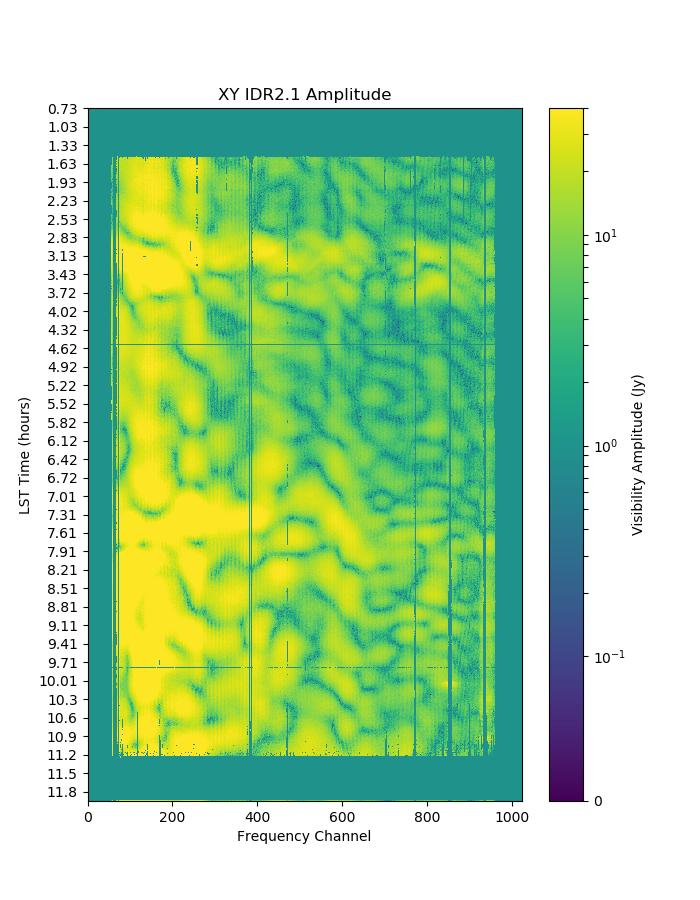

In [16]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(full_array[start_index:][:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=40,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray[start_index::step]*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XY IDR2.1 Amplitude')
plt.show()

In [7]:
#Create a list of the yx data
folders2=glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/*.uvfits')
folders2.sort()
#Print the list to verify it is working
print folders2

['/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12551.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12701.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12850.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12999.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.13148.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.13297.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.13446.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.13595.uvOCRSL.uvfits', '/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp

In [8]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
full_array2=[]

for folder in folders2:
    #Read in the given data file for the chosen antenna pair
    uvy.read_uvfits(folder, ant_pairs_nums=[(ant1,ant2)])
    print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array=uvy.get_data((ant1,ant2))
    #Get the times of the antenna
    times2=uvy.get_times(ant1,ant2)
    ind=uvy.antpair2ind(ant1,ant2)
    temptime=uvy.lst_array[ind]
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        full_array2=temp_array
        timearr2=times2
        first=False
    else:
        print('vstacking...')
        full_array2=np.vstack((full_array2, temp_array))
        timearr2=np.hstack((timearr2,times2))
    #Print the variables to check that everything is working properly
    print(first)
    print('temp shape:')
    print(temp_array.shape)
    print('Current_shape:')
    print(full_array2.shape)
    print('Time shape:')
    print(timearr2.shape)

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12551.uvOCRSL.uvfits
setting full for first time
False
temp shape:
(6, 1024)
Current_shape:
(6, 1024)
Time shape:
(6,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12701.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(12, 1024)
Time shape:
(12,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12850.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(18, 1024)
Time shape:
(18,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.12999.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(24, 1024)
Time shape:
(24,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.13148.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 10

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.18517.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(246, 1024)
Time shape:
(246,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.18666.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(252, 1024)
Time shape:
(252,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.18815.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(258, 1024)
Time shape:
(258,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.18964.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(264, 1024)
Time shape:
(264,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.19113.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.24482.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(486, 1024)
Time shape:
(486,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.24631.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(492, 1024)
Time shape:
(492,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.24780.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(498, 1024)
Time shape:
(498,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.24929.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(504, 1024)
Time shape:
(504,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.25078.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.30447.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(726, 1024)
Time shape:
(726,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.30596.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(732, 1024)
Time shape:
(732,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.30745.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(738, 1024)
Time shape:
(738,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.30895.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(744, 1024)
Time shape:
(744,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.31044.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.36412.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(966, 1024)
Time shape:
(966,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.36562.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(972, 1024)
Time shape:
(972,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.36711.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(978, 1024)
Time shape:
(978,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.36860.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(984, 1024)
Time shape:
(984,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.37009.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
C

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.42229.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1200, 1024)
Time shape:
(1200,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.42378.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1206, 1024)
Time shape:
(1206,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.42527.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1212, 1024)
Time shape:
(1212,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.42676.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1218, 1024)
Time shape:
(1218,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.42825.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.48045.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1434, 1024)
Time shape:
(1434,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.48194.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1440, 1024)
Time shape:
(1440,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.48343.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1446, 1024)
Time shape:
(1446,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.48492.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1452, 1024)
Time shape:
(1452,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.48641.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.53861.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1668, 1024)
Time shape:
(1668,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.54010.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1674, 1024)
Time shape:
(1674,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.54159.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1680, 1024)
Time shape:
(1680,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.54308.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1686, 1024)
Time shape:
(1686,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.54457.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.59677.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1902, 1024)
Time shape:
(1902,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.59826.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1908, 1024)
Time shape:
(1908,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.59975.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1914, 1024)
Time shape:
(1914,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.60124.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(1920, 1024)
Time shape:
(1920,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.60273.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.65493.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2136, 1024)
Time shape:
(2136,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.65642.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2142, 1024)
Time shape:
(2142,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.65791.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2148, 1024)
Time shape:
(2148,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.65940.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2154, 1024)
Time shape:
(2154,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.66089.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6,

Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.71309.uvOCRSL.uvfits
vstacking...
False
temp shape:
(6, 1024)
Current_shape:
(2370, 1024)
Time shape:
(2370,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.71458.uvOCRSL.uvfits
vstacking...
False
temp shape:
(4, 1024)
Current_shape:
(2374, 1024)
Time shape:
(2374,)
Accessing /data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen.grp1.of1.yx.LST.full_night.uvOCRSL.uvfits
vstacking...
False
temp shape:
(1, 1024)
Current_shape:
(2375, 1024)
Time shape:
(2375,)


<IPython.core.display.Javascript object>


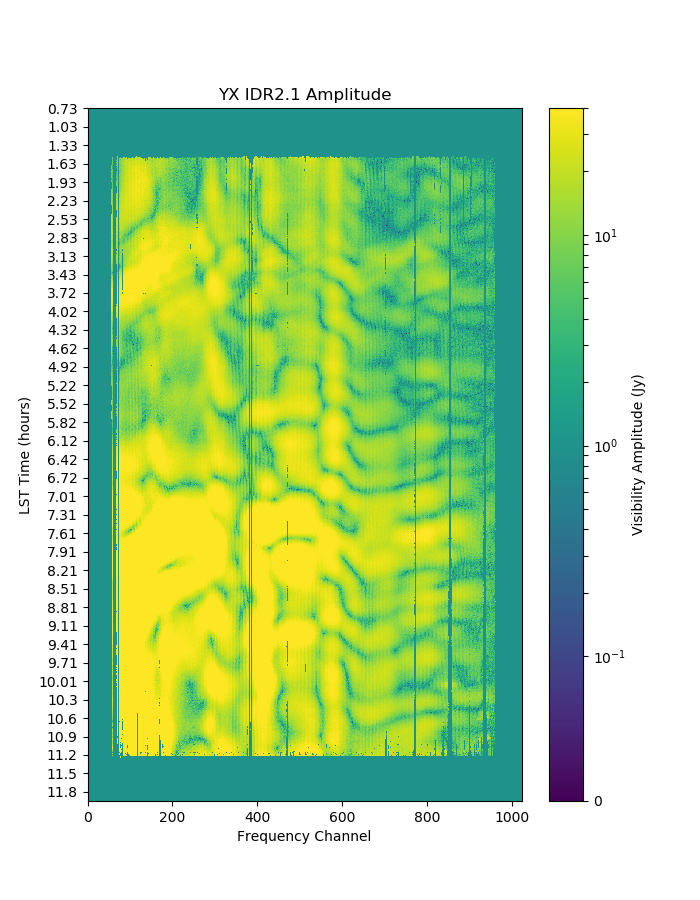

In [17]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(full_array2[start_index:][:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=40,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray[start_index::step]*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX IDR2.1 Amplitude')
plt.show()

Now that we have been able to read in and plot the entire night of cross pol data, let's plot them side by side. We will lock the axes together so that when we zoom in on one plot, it zooms in on the other as well. 

<IPython.core.display.Javascript object>


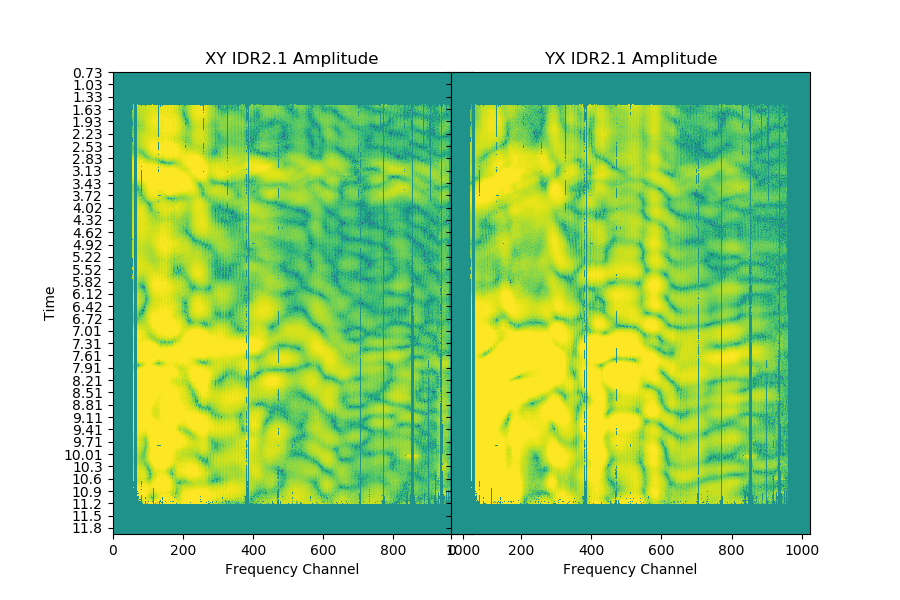

In [18]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(full_array[start_index:][:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=40,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray[start_index::step]*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XY IDR2.1 Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(full_array2[start_index:][:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=40,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray[start_index::step]*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YX IDR2.1 Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.058)

Next, we look at the visibility spectrum to check how much of the noise seen is caused by delay in the signal

In [11]:
#Plot the figure
plt.figure(figsize=(6,5))
#Take the mean of the time axis and plot both real and imaginary parts
plt.plot(np.mean(full_array[start_index:][:], axis=0).real, label='Real')
plt.plot(np.mean(full_array[start_index:][:], axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

Now we are going to look at the delay spectrum of the data, using fft.fftshift. 

In [12]:
# Take the time average of the full night of data
vis_avg = np.mean(full_array[start_index:,:], axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay = np.fft.fftshift(np.fft.fft(vis_avg))

# 2) Find the frequency width of a channel in GHz
freq_width = np.diff(uvx.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays = np.fft.fftshift(np.fft.fftfreq(uvx.Nfreqs,freq_width))*1e9

In [13]:
#Take the time average of the full night of data
vis_avg2 = np.mean(full_array2[start_index:][:], axis=0)
print full_array2.shape

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay2 = np.fft.fftshift(np.fft.fft(vis_avg2))
print vis_avg_delay2.shape
print vis_avg_delay2

# 2) Find the frequency width of a channel in GHz
freq_width2 = np.diff(uvy.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays2 = np.fft.fftshift(np.fft.fftfreq(uvy.Nfreqs,freq_width2))*1e9

(2375, 1024)
(1024,)
[46.374756 -47.197906j  2.9239502-80.992004j  6.0004272-77.92539j  ...
 58.29576  +10.049393j 81.76984  +21.267517j 72.09799  -37.778854j]


<IPython.core.display.Javascript object>


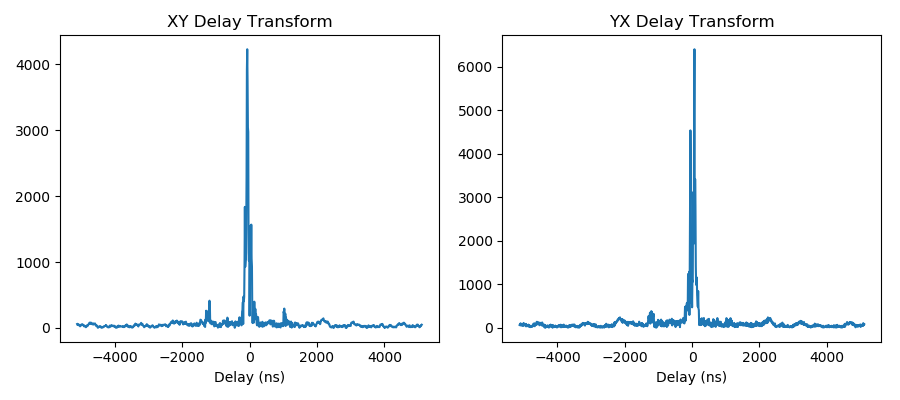

[-5120. -5110. -5100. ...  5090.  5100.  5110.]
[59.57014  46.168198 48.901848 ... 33.798527 41.032146 49.117188]


In [19]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plt.plot(delays,np.abs(vis_avg_delay))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
#plt.ylim(0,900)
plt.title('XY Delay Transform');

plt.subplot(122)
plt.plot(delays2,np.abs(vis_avg_delay2))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YX Delay Transform');

plt.tight_layout()

print delays
print np.abs(vis_avg_delay)
#print delays2
#print np.abs(vis_avg_delay2)
#max = np.max(np.abs(vis_avg_delay2))
#print max

In [15]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(full_array2[start_index:][:])/np.abs(full_array[start_index:][:]),aspect='auto',norm=SymLogNorm(vmin=0,vmax=2,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray[start_index::step]*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX-XY IDR2.1 Amplitude')
plt.show()

<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with shapes (1875,1024) (1876,1024) 

In [ ]:
gain = np.average(np.abs(full_array2[start_index:][:]))/np.average(np.abs(full_array[start_index:][:]))
print gain